In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Feature 0 - (Body): 6941.353721
Feature 1 - (TSS200): 4077.317694
Feature 2 - (5'UTR): 2592.386097
Feature 3 - (1stExon): 2394.906442
Feature 4 - (TSS1500): 2351.683257
Feature 5 - (3'UTR): 918.877800
Feature 6 - (Promoter_Associated): 5009.945652
Feature 7 - (Unclassified): 591.665891
Feature 8 - (Gene_Associated): 72.233341
Feature 9 - (Unclassified_Cell_type_specific): 29.040982
Feature 10 - (Promoter_Associated_Cell_type_specific): 163.581262
Feature 11 - (NonGene_Associated): 79.520558
Feature 12 - (Gene_Associated_Cell_type_specific): 170.626455
Feature 13 - (NonGene_Associated_Cell_type_specific): 0.517760
Feature 14 - (Island): 2828.526617
Feature 15 - (S_Shore): 29.934276
Feature 16 - (N_Shelf): 828.763503
Feature 17 - (N_Shore): 1.938117
Feature 18 - (S_Shelf): 715.818175
Feature 19 - (observed_to_expected_ratio): 808.966171
Feature 20 - (AAAA): 274.448285
Feature 21 - (AAAC): 157.947526
Feature 22 - (AAAG): 537.061333
Feature 23 - (AAAT): 29.418010
Feature 24 - (AACA): 753.4

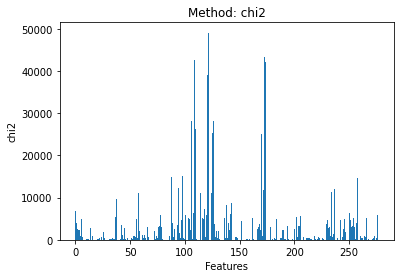

In [ ]:
# read the data into the memory
df = pd.read_csv('processed_long_train.csv')

# delete columns that are not needed - Important: Change the following line to exclude more or less features, re-run the whole code!
unwanted = ['Forward_Sequence', 'seq', 'observed_ratio', 'expected_ratio', 'expected_ratio_test']

df = df.drop(labels = unwanted, axis = 1)

x = df.drop(['Beta'], axis = 1)
y = df['Beta']



def select_features(xtrain, ytrain, method, title, N):
    fs = SelectKBest(score_func=method, k='all')
    fs.fit(xtrain, ytrain)

    for i in range(len(fs.scores_)):
        print('Feature %d - (%s): %f' % (i, xtrain.columns[i], fs.scores_[i]))
        
    # plot the scores
    plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
    plt.title("Method: " + title)
    plt.xlabel("Features")
    plt.ylabel(title)
    plt.show()
    
    scores = fs.scores_
    idx = sorted(range(len(scores)), key = lambda sub: scores[sub])[-N:] 

    
    return xtrain. iloc[:, idx]
    
# add more tests here as follows: select_features(xtrain, ytrain, <<method from sklearn>>, '<<title of the graph>>', N = <<N highest score features>>)
# https://machinelearningmastery.com/feature-selection-with-categorical-data/

x_new = select_features(x, y, chi2, 'chi2', N = 15)
# x_new = select_features(x, y, mutual_info_classif, 'Mutual info', N = 10)


# split the set 60-40
np.random.seed(26)
msk = np.random.rand(len(x_new)) < 0.6

x_new_train = x_new[msk]
x_new_test = x_new[~msk]

y_train = y[msk]
y_test = y[~msk]

# from now on do whatever you want with the previous dataframes

In [ ]:
print(x_new.head())

   CGGC  CCGG  CGGG  CCCG  GGCG  CGCC  GCGG  CCGC  GCGC  CGCG
0     9     8    11    12     9    12     9     8    11     8
1     4     5     3     3     3     1     2     3     4     2
2     7    12     8     7     7     6     5     4     4     2
3     8    12    15     8    13     7    14     8     4     1
4    16    20    12    23     4    21     8    19     7     7


Feature 0 - (Body): 0.090644
Feature 1 - (TSS200): 0.080932
Feature 2 - (5'UTR): 0.043413
Feature 3 - (1stExon): 0.041579
Feature 4 - (TSS1500): 0.041638
Feature 5 - (3'UTR): 0.009136
Feature 6 - (Promoter_Associated): 0.196352
Feature 7 - (Unclassified): 0.014441
Feature 8 - (Gene_Associated): 0.003139
Feature 9 - (Unclassified_Cell_type_specific): 0.000000
Feature 10 - (Promoter_Associated_Cell_type_specific): 0.002530
Feature 11 - (NonGene_Associated): 0.005098
Feature 12 - (Gene_Associated_Cell_type_specific): 0.005350
Feature 13 - (NonGene_Associated_Cell_type_specific): 0.000000
Feature 14 - (Island): 0.133414
Feature 15 - (S_Shore): 0.001728
Feature 16 - (N_Shelf): 0.016522
Feature 17 - (N_Shore): 0.001115
Feature 18 - (S_Shelf): 0.010435
Feature 19 - (observed_to_expected_ratio): 0.338403
Feature 20 - (AAAA): 0.008573
Feature 21 - (AAAC): 0.005991
Feature 22 - (AAAG): 0.011463
Feature 23 - (AAAT): 0.004279
Feature 24 - (AACA): 0.004829
Feature 25 - (AACC): 0.000476
Feature 26 -

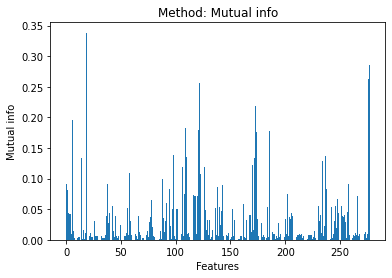

In [ ]:
x_new_mi = select_features(x, y, mutual_info_classif, 'Mutual info', N = 20)

In [ ]:
print(x_new_mi.head())

   CGGG  CGGC  GCCG  CGGA  TCCG  Island  GCGA  CCGG  TCGC  CATG  GCGG  GGCG  \
0    11     9     6     8     4       1     7     8     5     6     9     9   
1     3     4     3     3     3       1     3     5     1     8     2     3   
2     8     7     6     4     4       1     1    12     5     7     5     7   
3    15     8    16     3     2       1     2    12     7     6    14    13   
4    12    16    15     7    14       1     3    20    12     7     8     4   

   CGCC  CCGC  Promoter_Associated  GCGC  CGCG  Is-GC  percentage_pos  \
0    12     8                    0    11     8   True        0.803401   
1     1     3                    0     4     2  False        0.680427   
2     6     4                    1     4     2  False        0.607815   
3     7     8                    0     4     1  False        0.135534   
4    21    19                    1     7     7   True        0.824163   

   observed_to_expected_ratio  
0                    0.713165  
1                    0

Feature 0 - (Body): 6941.353721
Feature 1 - (TSS200): 4077.317694
Feature 2 - (5'UTR): 2592.386097
Feature 3 - (1stExon): 2394.906442
Feature 4 - (TSS1500): 2351.683257
Feature 5 - (3'UTR): 918.877800
Feature 6 - (Promoter_Associated): 5009.945652
Feature 7 - (Unclassified): 591.665891
Feature 8 - (Gene_Associated): 72.233341
Feature 9 - (Unclassified_Cell_type_specific): 29.040982
Feature 10 - (Promoter_Associated_Cell_type_specific): 163.581262
Feature 11 - (NonGene_Associated): 79.520558
Feature 12 - (Gene_Associated_Cell_type_specific): 170.626455
Feature 13 - (NonGene_Associated_Cell_type_specific): 0.517760
Feature 14 - (Island): 2828.526617
Feature 15 - (S_Shore): 29.934276
Feature 16 - (N_Shelf): 828.763503
Feature 17 - (N_Shore): 1.938117
Feature 18 - (S_Shelf): 715.818175
Feature 19 - (observed_to_expected_ratio): 808.966171
Feature 20 - (AAAA): 274.448285
Feature 21 - (AAAC): 157.947526
Feature 22 - (AAAG): 537.061333
Feature 23 - (AAAT): 29.418010
Feature 24 - (AACA): 753.4

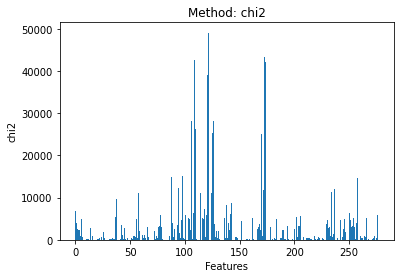

   CAGG  TGTG  CACA  CATG  GCCG  CGGC  CCGG  CGGG  CCCG  GGCG  CGCC  GCGG  \
0     9    13     4     6     6     9     8    11    12     9    12     9   
1     5    11     6     8     3     4     5     3     3     3     1     2   
2    13     3     8     7     6     7    12     8     7     7     6     5   
3    21    10     7     6    16     8    12    15     8    13     7    14   
4     9     7    13     7    15    16    20    12    23     4    21     8   

   CCGC  GCGC  CGCG  
0     8    11     8  
1     3     4     2  
2     4     4     2  
3     8     4     1  
4    19     7     7  


In [ ]:
x_new_chi = select_features(x, y, chi2, 'chi2', N = 15)
print(x_new_chi.head())

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ddf6b85a-936f-43e7-bfb4-c1fea12493a9' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>